In [3]:
import csv
import pprint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from statistics import mean

simulation_result_files = [
   [
       '1kt0.csv',
       '1kt1.csv'
   ],
   [
       '2kt0.csv',
       '2kt1.csv'
   ],
   [
       '3kt0.csv',
       '3kt1.csv'
   ],
   [
       '4kt0.csv',
       '4kt1.csv'
   ],
   [
       '5kt0.csv',
       '5kt1.csv'
   ],
   [
       '6kt0.csv',
       '6kt1.csv'
   ],
   [
       '7kt0.csv',
       '7kt1.csv'
   ],
   [
       '8kt0.csv',
       '8kt1.csv'
   ],
   [
       '9kt0.csv',
       '9kt1.csv'
   ],
   [
       '10kt0.csv',
       '10kt1.csv'
   ],
   [
       '11kt0.csv',
       '11kt1.csv'
   ],
   [
       '12kt0.csv',
       '12kt1.csv'
   ],
   [
       '13kt0.csv',
       '13kt1.csv'
   ],
   [
       '14kt0.csv',
       '14kt1.csv'
   ],
   [
       '15kt0.csv',
       '15kt1.csv'
   ],
   [
       '16kt0.csv',
       '16kt1.csv'
   ],
   [
       '17kt0.csv',
       '17kt1.csv'
   ],
   [
       '18kt0.csv',
       '18kt1.csv'
   ],
   [
       '19kt0.csv',
       '19kt1.csv'
   ],
   [
       '20kt0.csv',
       '20kt1.csv'
   ],
   [
       '21kt0.csv',
       '21kt1.csv'
   ],
   [
       '22kt0.csv',
       '22kt1.csv'
   ],
   [
       '23kt0.csv',
       '23kt1.csv'
   ],
   [
       '24kt0.csv',
       '24kt1.csv'
   ],
   [
       '25kt0.csv',
       '25kt1.csv'
   ],
   [
       '26kt0.csv',
       '26kt1.csv'
   ],
   [
       '27kt0.csv',
       '27kt1.csv'
   ],
   [
       '28kt0.csv',
       '28kt1.csv'
   ],
   [
       '29kt0.csv',
       '29kt1.csv'
   ],
   [
       '30kt0.csv',
       '30kt1.csv'
   ]
]

FLAG_PARTICLE = {
    'e-': '1',
    'proton': '2',
    'GenericIon': '3'}

FLAG_PROCESS = {
    'msc': '10',
    'e-_G4MicroElecElastic': '11',
    'e-_G4MicroElecInelastic': '12',
    'eCapture': '13',
    'p_G4MicroElecInelastic': '14',
    'ion_G4MicroElecInelastic': '15',
    'hIoni': '16',
    'eIoni': '17'}

PARTICLE_COL = 0
PROCESS_COL = 1
X_COL = 2
Y_COL = 3
Z_COL = 4
TOTAL_ENERGY_COL = 5
STEP_LENGTH_COL = 6
KINETIC_ENERGY_COL = 7

DETECTOR_OFFSET = 2000
DEPLETION_BEGINNING = 400
DEPLETION_END = 500

pp = pprint.PrettyPrinter(indent=4)
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [10]:
# loop through all files and extract results

particle_count = {
    'electron': 0,
    'proton': 0,
    'ion': 0
}

process_count = {
    'msc': 0,
    'e_elastic': 0,
    'e_inelastic': 0,
    'e_capture': 0,
    'p_inelastic': 0,
    'ion_inelastic': 0,
    'h_ionisation': 0,
    'e_ionisation': 0,
}

# store data in these variables
energies_over_range = []
position_of_secondaries = []

count = 0
for result_file in simulation_result_files:
    # get the average position and energy deposited
    position_of_secondaries.append([])
    energies_over_range.append([])
    for rfile in result_file:
        with open(rfile) as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                if len(row) > 1:
                    if (row[PARTICLE_COL] == FLAG_PARTICLE['e-'] 
                            and row[PROCESS_COL] == FLAG_PROCESS['eIoni']):
                        position_of_secondaries[count].append(float(row[Z_COL]))
                        if (float(row[Z_COL]) + DETECTOR_OFFSET < DEPLETION_END 
                                and float(row[Z_COL]) + DETECTOR_OFFSET > DEPLETION_BEGINNING):
                            energies_over_range[count].append(float(row[KINETIC_ENERGY_COL]))
    count += 1

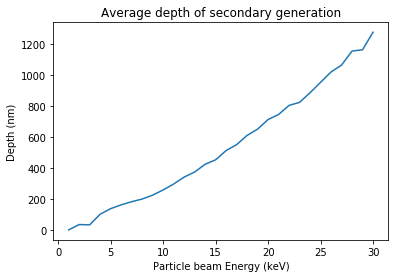

In [9]:
# plot the average depth of all particle interactions
mean_position = []
energies = range(1, 31)
for pos in position_of_secondaries:
    if len(pos) > 0:
        mean_position.append(mean(pos) + DETECTOR_OFFSET)
    else:
        mean_position.append(0)
plt.plot(energies, mean_position)
plt.title('Average depth of secondary generation')
plt.xlabel('Particle beam Energy (keV)')
plt.ylabel('Depth (nm)')
plt.show()

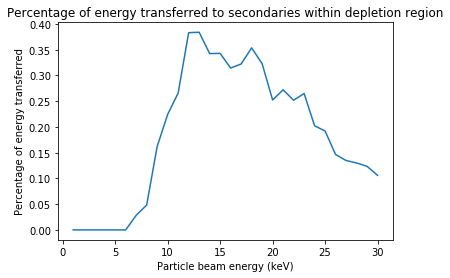

In [16]:
# plot percentage of energy deposited
ELECTRON_NUMBER = 10000
CONVERT_TO_THOUSAND = 1000
CONVERT_TO_PERCENTAGE = 100
mean_energy = []
for energy in energies:
    energies_at = energies_over_range[energy-1]
    if len(energies_at) > 0:
        mean_energy.append(sum(energies_at) /
                (energy * ELECTRON_NUMBER * CONVERT_TO_THOUSAND) * CONVERT_TO_PERCENTAGE)
    else:
        mean_energy.append(0)
plt.plot(energies, mean_energy)
plt.title('Percentage of energy transferred to secondaries within depletion region')
plt.xlabel('Particle beam energy (keV)')
plt.ylabel('Percentage of energy transferred')
plt.show()

In [24]:
# extract data from a single energy level results
ENERGY_LEVEL = 20
ENERGY_LEVEL_INDEX = ENERGY_LEVEL - 1

positions = []
energy_deposition_depth = []
step_length_tracks = []
secondaries = []

for result_file in simulation_result_files[ENERGY_LEVEL_INDEX]:
    with open(result_file) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            # ignore header lines
            if len(row) > 1:
                count_particle(row)
                count_process(row)
                tracking_position(row)
                track_energy_deposition(row)
                track_step_length(row)
                track_secondaries(row)

def count_particle(row):
    if row[PARTICLE_COL] == FLAG_PARTICLE['e-']:
        particle_count['electron'] += 1
    elif row[PARTICLE_COL] == FLAG_PARTICLE['proton']:
        particle_count['proton'] += 1
    elif row[PARTICLE_COL] == FLAG_PARTICLE['GenericIon']:
        particle_count['ion'] += 1

def count_process(row):
    if row[PROCESS_COL] == FLAG_PROCESS['msc']:
        process_count['msc'] += 1
    elif row[PROCESS_COL] == FLAG_PROCESS['e-_G4MicroElecElastic']:
        process_count['e_elastic'] += 1
    elif row[PROCESS_COL] == FLAG_PROCESS['e-_G4MicroElecInelastic']:
        process_count['e_inelastic'] += 1
    elif row[PROCESS_COL] == FLAG_PROCESS['eCapture']:
        process_count['e_capture'] += 1
    elif row[PROCESS_COL] == FLAG_PROCESS['p_G4MicroElecInelastic']:
        process_count['p_inelastic'] += 1
    elif row[PROCESS_COL] == FLAG_PROCESS['ion_G4MicroElecInelastic']:
        process_count['ion_inelastic'] += 1
    elif row[PROCESS_COL] == FLAG_PROCESS['hIoni']:
        process_count['h_ionisation'] += 1
    elif row[PROCESS_COL] == FLAG_PROCESS['eIoni']:
        process_count['e_ionisation'] += 1

def tracking_position(row):
    pos = (row[X_COL], row[Y_COL], row[Z_COL], row[PARTICLE_COL])
    positions.append(pos)

def track_energy_deposition(row):
    # only worry about energy deposited from electrons
    if (row[PARTICLE_COL] == FLAG_PARTICLE['e-']):
        energy_deposition_depth.append(
            (row[Z_COL], row[TOTAL_ENERGY_COL], row[KINETIC_ENERGY_COL]))

def track_step_length(row):
    # only consider electrons
    # comparison of step length and depth
    # comparison of step length and energy deposition
    if row[PARTICLE_COL] == FLAG_PARTICLE['e-']:
        step_length_tracks.append(
            (row[Z_COL], row[STEP_LENGTH_COL], row[TOTAL_ENERGY_COL]))

def track_secondaries(row):
    if (row[PARTICLE_COL] == FLAG_PARTICLE['e-'] 
            and row[PROCESS_COL] == FLAG_PROCESS['eIoni']):
        secondaries.append(row)

In [26]:
print('Summary of simulation')
print('Particle event count')
pp.pprint(particle_count)
print('Process event count')
pp.pprint(process_count)

Summary of simulation
Particle event count
{'electron': 52603, 'ion': 0, 'proton': 0}
Process event count
{   'e_capture': 0,
    'e_elastic': 0,
    'e_inelastic': 0,
    'e_ionisation': 6563,
    'h_ionisation': 0,
    'ion_inelastic': 0,
    'msc': 46040,
    'p_inelastic': 0}


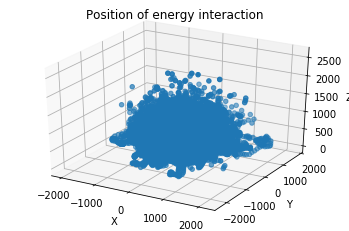

In [32]:
# graph position of each interaction
ax = plt.axes(projection='3d')

elec_pos = [[], [], []]
for pos in positions:
    elec_pos[0].append(float(pos[0]))
    elec_pos[1].append(float(pos[1]))
    elec_pos[2].append(float(pos[2]) + DETECTOR_OFFSET)

# graph different particle positions
ax.scatter3D(elec_pos[0], elec_pos[1], elec_pos[2], marker='o')

ax.set_title('Position of energy interaction')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Text(0, 0.5, 'Energy (keV)')

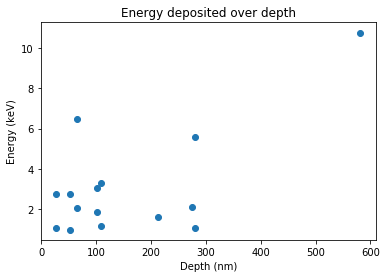

In [41]:
# graph the energy deposited over the depth of the detector
depth = []
energy = []

for depth_energy in energy_deposition_depth:
    depth_pos = float(depth_energy[0])
    if depth_pos > 0:
        depth.append(depth_pos)
        energy.append(float(depth_energy[1]))

plt.scatter(depth, [ i / CONVERT_TO_THOUSAND for i in energy])

plt.title('Energy deposited over depth')
plt.xlabel('Depth (nm)')
plt.ylabel('Energy (keV)')

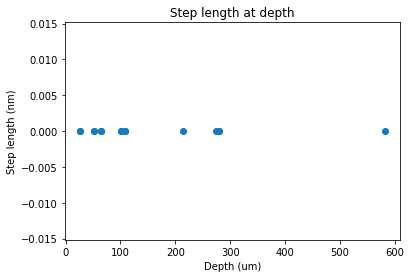

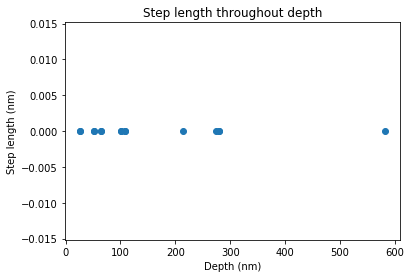

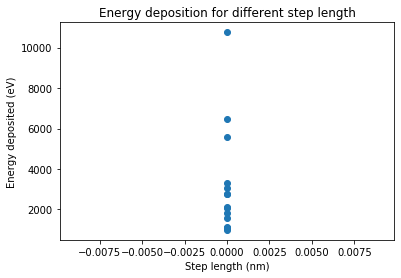

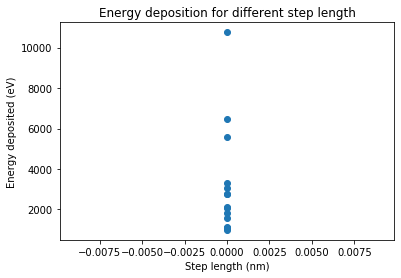

In [42]:
# graph the step length of each interaction
depths = []
step_lengths = []
energy_depositions = []

CONVERT_TO_NANO = 1 * 10 ** 9

for step_length_track in step_length_tracks:
    depth = float(step_length_track[0])

    if depth > 0:
        step_length = float(step_length_track[1])/CONVERT_TO_NANO
        energy_deposition = float(step_length_track[2])

        depths.append(depth)
        step_lengths.append(step_length)
        energy_depositions.append(energy_deposition)

plt.scatter(depths, step_lengths)
plt.title('Step length at depth')
plt.xlabel('Depth (um)')
plt.ylabel('Step length (nm)')
plt.show()

plt.scatter(depths, step_lengths)
plt.title('Step length throughout depth')
plt.xlabel('Depth (nm)')
plt.ylabel('Step length (nm)')
plt.show()

plt.scatter(step_lengths, energy_depositions)
plt.title('Energy deposition for different step length')
plt.xlabel('Step length (nm)')
plt.ylabel('Energy deposited (eV)')
plt.show()

plt.scatter(step_lengths, energy_depositions)
plt.title('Energy deposition for different step length')
plt.xlabel('Step length (nm)')
plt.ylabel('Energy deposited (eV)')
plt.show()

Average of the list = 2397.8783113366585


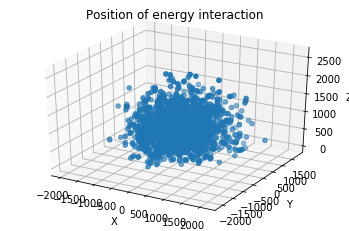

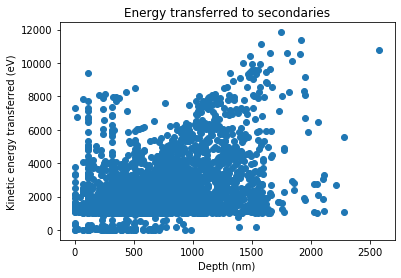

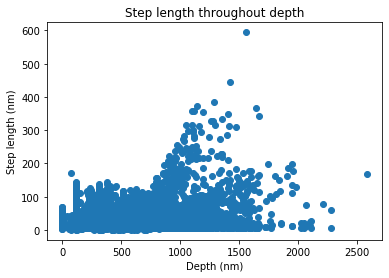

In [47]:
# graph the secondaries
ax = plt.axes(projection='3d')

x_pos = []
y_pos = []
z_pos = []
energies = []
step_length = []
kin_energies = []
for secondary in secondaries:
    # remove if z is below zero, outside
    if (float(secondary[Z_COL]) >= 0 or True):
        energies.append(float(secondary[TOTAL_ENERGY_COL]))
        x_pos.append(float(secondary[X_COL]))
        y_pos.append(float(secondary[Y_COL]))
        z_pos.append(float(secondary[Z_COL]) + DETECTOR_OFFSET)
        step_length.append(float(secondary[STEP_LENGTH_COL]))

    kin_energies.append(float(secondary[KINETIC_ENERGY_COL]))

print("Average of the list =", mean(kin_energies))

# graph different particle positions
ax.scatter(x_pos, y_pos, z_pos, marker='o')
ax.set_title('Position of energy interaction')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

plt.scatter(z_pos, kin_energies)
plt.title('Energy transferred to secondaries')
plt.ylabel('Kinetic energy transferred (eV)')
plt.xlabel('Depth (nm)')
plt.show()

plt.title('Step length throughout depth')
plt.xlabel('Depth (nm)')
plt.ylabel('Step length (nm)')
plt.scatter(z_pos, step_length)
plt.show()